# Option Pricing model

In [1]:
'''
# This program calculates the fair value option price for put and call options using the Black-Scholes model.
# 20211107: expanded input for underlying prices from a single value to a list
# 20211107.02: added visual for the payoff profile of the first call option at expiry
# 20211107.03: read input from CSV file (sample datafile in repo), 
                calculate theoretical option values for a series of multiple inputs
                writes output to CSV file
'''
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

# Inputs

In [2]:
'''
Input file should contain 7 columns as follows:
S = underlying price
X = exercise price
r = interest rate in decimal form. i.e. 2% = 0.02
t = time to expiry, in years. For example, 6 months = 0.5
vol = volatility, annualized. For exammple, 25% = 0.25
call_premium = call option, quoted(observed) value 
put_premium = put option, quoted(observed) value  
'''

'\nInput file should contain 7 columns as follows:\nS = underlying price\nX = exercise price\nr = interest rate in decimal form. i.e. 2% = 0.02\nt = time to expiry, in years. For example, 6 months = 0.5\nvol = volatility, annualized. For exammple, 25% = 0.25\ncall_premium = call option, quoted(observed) value \nput_premium = put option, quoted(observed) value  \n'

In [3]:
df = pd.read_csv('option_inputs.csv')

In [4]:
df.head()

,S,X,r,t,vol,call_premium,put_premium
0,10.0,9.0,0.02,0.5,0.3,1.38,0.35
1,11.5,9.0,0.02,0.5,0.3,2.60,0.28
2,12.0,9.0,0.02,0.5,0.3,3.06,0.22
3,10.0,10.0,0.02,0.5,0.3,0.85,0.36
4,11.5,10.0,0.02,0.5,0.3,1.85,0.29


# Calculations

In [5]:
call_values = []
put_values = []

for i in range(len(df.S)):
    d1 = (math.log(df.S[i]/df.X[i]) + 0.5*(df.vol[i]*df.vol[i])*df.t[i]) / (df.vol*math.sqrt(df.t[i]))
    d2 = d1 - df.vol[i]*math.sqrt(df.t[i])
    Nd1=norm.cdf(d1)
    Nd2=norm.cdf(d2)
    call = math.exp(-1*df.r[i]*df.t[i])*(df.S[i]*Nd1 - df.X[i]*Nd2)
    call_values.append(call[i])
    put = math.exp(-1*df.r[i]*df.t[i])*(df.X[i]*(1-Nd2)-df.S[i]*(1-Nd1))
    put_values.append(put[i])

In [6]:
df = df.assign(call_value=pd.Series(call_values).values)
df = df.assign(put_value=pd.Series(put_values).values)
df.head()

,S,X,r,t,vol,call_premium,put_premium,call_value,put_value
0,10.0,9.0,0.02,0.5,0.3,1.38,0.35,1.385063,0.395013
1,11.5,9.0,0.02,0.5,0.3,2.60,0.28,2.605860,0.130735
2,12.0,9.0,0.02,0.5,0.3,3.06,0.22,3.057886,0.087736
3,10.0,10.0,0.02,0.5,0.3,0.85,0.36,0.836295,0.836295
4,11.5,10.0,0.02,0.5,0.3,1.85,0.29,1.828828,0.343753


# Output

In [7]:
df.to_csv('option_outputs.csv')

# Visualization

In [8]:
# Call value at expiry
# Profit_Loss = y = S - X - c

S_increments = [-5, -4, -3, -2, -1, -.75, -.5, -.25, -.1, 0, +.1, +.25, +.5, +.75, +1, +2, +3, +4, +5]
S_T = []
call_profit = []

# underlying price at option expiry, time T
for i in range(len(S_increments)):
    S_T.append(df.S[0]+S_increments[i])
    y = max(S_T[i]-df.X[0],0) - df.call_premium[0]
    call_profit.append(y)

Text(0.5, 0, 'Underlying price at option expiry (time=T)')

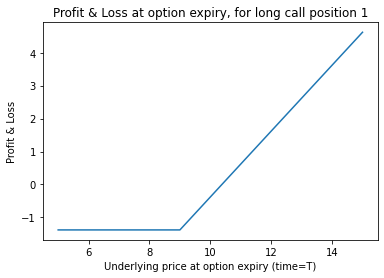

In [9]:
plt.plot(S_T, call_profit)
plt.title('Profit & Loss at option expiry, for long call position 1')
plt.ylabel('Profit & Loss')
plt.xlabel('Underlying price at option expiry (time=T)')